<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#MIDS---w261-Machine-Learning-At-Scale" data-toc-modified-id="MIDS---w261-Machine-Learning-At-Scale-1">MIDS - w261 Machine Learning At Scale</a></span><ul class="toc-item"><li><span><a href="#Assignment---HW4" data-toc-modified-id="Assignment---HW4-1.1">Assignment - HW4</a></span><ul class="toc-item"><li><span><a href="#INSTRUCTIONS-for-SUBMISSION" data-toc-modified-id="INSTRUCTIONS-for-SUBMISSION-1.1.1">INSTRUCTIONS for SUBMISSION</a></span></li><li><span><a href="#CONFIGURATION" data-toc-modified-id="CONFIGURATION-1.1.2">CONFIGURATION</a></span></li><li><span><a href="#DATASETS" data-toc-modified-id="DATASETS-1.1.3">DATASETS</a></span></li></ul></li></ul></li><li><span><a href="#HW-Problems" data-toc-modified-id="HW-Problems-2">HW Problems</a></span><ul class="toc-item"><li><span><a href="#HW4.0" data-toc-modified-id="HW4.0-2.1">HW4.0</a></span></li><li><span><a href="#HW4.1" data-toc-modified-id="HW4.1-2.2">HW4.1</a></span></li><li><span><a href="#HW4.2----Preprocess-log-file-data" data-toc-modified-id="HW4.2----Preprocess-log-file-data-2.3">HW4.2  - Preprocess log file data</a></span></li><li><span><a href="#HW4.3---Find-the-most-frequent-pages" data-toc-modified-id="HW4.3---Find-the-most-frequent-pages-2.4">HW4.3 - Find the most frequent pages</a></span></li><li><span><a href="#HW4.4----Find-the-most-frequent-visitor" data-toc-modified-id="HW4.4----Find-the-most-frequent-visitor-2.5">HW4.4  - Find the most frequent visitor</a></span><ul class="toc-item"><li><span><a href="#Run-a-test-on-some-data-that-has-multiple-visits" data-toc-modified-id="Run-a-test-on-some-data-that-has-multiple-visits-2.5.1">Run a test on some data that has multiple visits</a></span></li></ul></li><li><span><a href="#HW4.5---Clustering-Tweet-Dataset" data-toc-modified-id="HW4.5---Clustering-Tweet-Dataset-2.6">HW4.5 - Clustering Tweet Dataset</a></span></li><li><span><a href="#K-Means" data-toc-modified-id="K-Means-2.7">K-Means</a></span></li><li><span><a href="#K-means-algorithm" data-toc-modified-id="K-means-algorithm-2.8">K-means algorithm</a></span></li><li><span><a href="#Calculating-purity" data-toc-modified-id="Calculating-purity-2.9">Calculating purity</a></span></li><li><span><a href="#HW4.6----(OPTIONAL)-Scaleable-K-MEANS++" data-toc-modified-id="HW4.6----(OPTIONAL)-Scaleable-K-MEANS++-2.10">HW4.6  - (OPTIONAL) Scaleable K-MEANS++</a></span><ul class="toc-item"><li><span><a href="#4.6.1-(OPTIONAL)-Apply-K-MEANS||" data-toc-modified-id="4.6.1-(OPTIONAL)-Apply-K-MEANS||-2.10.1">4.6.1 (OPTIONAL) Apply K-MEANS||</a></span></li></ul></li><li><span><a href="#HW4.7---(OPTIONAL)-Canopy-Clustering" data-toc-modified-id="HW4.7---(OPTIONAL)-Canopy-Clustering-2.11">HW4.7 - (OPTIONAL) Canopy Clustering</a></span><ul class="toc-item"><li><span><a href="#4.7.1-(OPTIONAL)-Apply-Canopy-Clustering-based-K-MEANS" data-toc-modified-id="4.7.1-(OPTIONAL)-Apply-Canopy-Clustering-based-K-MEANS-2.11.1">4.7.1 (OPTIONAL) Apply Canopy Clustering based K-MEANS</a></span></li></ul></li></ul></li></ul></div>

# MIDS - w261 Machine Learning At Scale 
__Course Lead:__ Dr James G. Shanahan (__email__ Jimi via  James.Shanahan _AT_ gmail.com)

## Assignment - HW4



---
__Name:__  *Your Name Goes Here*   
__Class:__ MIDS w261 (Section *Your Section Goes Here*, e.g., Fall 2016 Group 1)     
__Email:__  *Your UC Berkeley Email Goes Here*@iSchool.Berkeley.edu     
__StudentId__  123457    __End of StudentId__     

__NOTE:__ please replace `1234567` with your student id above      

### INSTRUCTIONS for SUBMISSION

This homework can be completed locally on your computer. __Please submit your notebook to your classroom github repository 24 hours prior to the next live session.__ 

### CONFIGURATION
Before starting your homework run the following cells to confirm your setup.

In [1]:
# general imports
import os
import re
import sys
import numpy as np
import matplotlib.pyplot as plt

# tell matplotlib not to open a new window
%matplotlib inline

# automatically reload modules 
%reload_ext autoreload
%autoreload 2

In [2]:
# print some configuration details for future replicability.
print 'Python Version: %s' % (sys.version.split('|')[0])
hdfs_conf = !hdfs getconf -confKey fs.defaultFS ### UNCOMMENT ON DOCKER
#hdfs_conf = !hdfs getconf -confKey fs.default.name ### UNCOMMENT ON ALTISCALE
print 'HDFS filesystem running at: \n\t %s' % (hdfs_conf[0])

Python Version: 2.7.14 
HDFS filesystem running at: 
	 hdfs://quickstart.cloudera:8020


In [3]:
# create an HDFS directory for this assignment
!hdfs dfs -mkdir hw4

__[OPTIONAL]:__ Save yourself some typing by defining global variables for paths we'll reuse frequently.

In [5]:
HDFS_DIR = "/user/root/hw4" # eg. /user/root/hw3 
HOME_DIR = os.getcwd()

__[OPTIONAL]:__ Fix chrome formatting. _The cell below implements a quick hack based on [this stackoverflow thread](http://stackoverflow.com/questions/34277967/chrome-rendering-mathjax-equations-with-a-trailing-vertical-line) to fix [this known issue](https://github.com/mathjax/MathJax/issues/1300) with Mathjax formatting in Chrome (a rounding issue adds a border to the right of mathjax markup)._

In [4]:
%%javascript
$('.math>span').css("border-left-color","transparent")

<IPython.core.display.Javascript object>

### DATASETS
For this homework we be using two different datasets:
* __Microsoft log files data__ (available from the [UC Irvine KDD Archive](https://kdd.ics.uci.edu/databases/msweb/msweb.html) at [this url](http://archive.ics.uci.edu/ml/machine-learning-databases/anonymous/) - _This data, referenced in the asynch lectures, captures which areas (Vroots) of www.microsoft.com each user visited in a one-week timeframe in Feburary 1998. We'll perform preprocessing on the data in HW 4.2 and find the most frequently visited pages and visitors in HW 4.3 and 4.4_
* __Tweets data__ (from [this publication](https://arxiv.org/abs/1505.04342) in the Journal of Computation Science and available at [this url] - _This data, comes from a corpus of Tweets that were hand coded to reflect whether the tweet was written by a human,cyborg,robot or spammer. The data are in two files: the primary [topUsers file](https://www.dropbox.com/s/6129k2urvbvobkr/topUsers_Apr-Jul_2014_1000-words.txt?dl=0), and an auxilary [word summaries](https://www.dropbox.com/s/w4oklbsoqefou3b/topUsers_Apr-Jul_2014_1000-words_summaries.txt?dl=0) file (more details below). We'll perform a KMeans clustering analysis on this data in HW 4.5._

Follow the directions below to load each of these datasets. You may want to familiarize yourself with their contents before proceeding to the homework questions.

__`anonymous-msweb.data`__  
Notes on the data format:
> The data is in an ASCII-based sparse-data format called "DST". Each line of the data file starts with a letter which tells the line's type. The three line types of interest are:

>__Attribute lines__:
e.g. `A,1277,1,"NetShow for PowerPoint","/stream"`
Where:
  'A' marks this as an attribute line, 
  '1277' is the attribute ID number for an area of the website (called a Vroot),
  '1' may be ignored, 
  '"NetShow for PowerPoint"' is the title of the Vroot, 
  '"/stream"' is the URL relative to "http://www.microsoft.com"

>__Case and Vote Lines__:
For each user, there is a case line followed by zero or more vote lines.
For example:
  C,"10164",10164
  V,1123,1
  V,1009,1
  V,1052,1
Where:
  'C' marks this as a case line, 
  '10164' is the case ID number of a user, 
  'V' marks the vote lines for this case, 
  '1123', 1009', 1052' are the attributes ID's of Vroots that a user visited. 
  '1' may be ignored.
  
Run the cells below to download and examine the file.

In [6]:
# download the data
!curl -L http://archive.ics.uci.edu/ml/machine-learning-databases/anonymous/anonymous-msweb.data -o anonymous-msweb.data

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1389k  100 1389k    0     0   347k      0  0:00:04  0:00:04 --:--:--  303k


In [7]:
# take a look
!head -n 5 anonymous-msweb.data

I,4,"www.microsoft.com","created by getlog.pl"
T,1,"VRoot",0,0,"VRoot"
N,0,"0"
N,1,"1"
T,2,"Hide1",0,0,"Hide"


__`topUsers_Apr-Jul_2014_1000-words.txt`__  
Notes about the data coding:  
> This file consists of word frequency distributions for 1,000 twitter users. These Twitter users use language in very different ways,and were classified by hand according to the criteria:  

>__0__: Human, _where only basic human-human communication is observed._  

>__1__: Cyborg, _where language is primarily borrowed from other sources. (e.g., jobs listings, classifieds postings, advertisements, etc...)._  

> __2__: Robot, _where language is formulaically derived from unrelated sources(e.g., weather/seismology, police/fire event logs, etc...)._  

>__3__: Spammer, _where language is replicated to high multiplicity
(e.g., celebrity obsessions, personal promotion, etc...)_

Data format:
> `USERID,CODE,TOTAL,WORD1_COUNT,WORD2_COUNT,...`  
where   
USERID = unique user identifier  
CODE = 0/1/2/3 class code  
TOTAL = sum of the word counts  

Run the cells below to load and preview the data. 

In [8]:
# download the main Twitter data
!curl -L -O https://www.dropbox.com/s/6129k2urvbvobkr/topUsers_Apr-Jul_2014_1000-words.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 2493k  100 2493k    0     0   623k      0  0:00:04  0:00:04 --:--:--  691k


In [9]:
# take a look at the first row
!head -n 1 topUsers_Apr-Jul_2014_1000-words.txt

1180025371,2,1724608,75552,827,57603,7128,4282,45674,66811,27632,0,8,23783,2,42853,0,62335,22349,21428,19801,4125,0,0,2,1585,21118,1,1,1,16079,19676,1587,0,19695,0,0,0,0,0,0,2,20216,60,4278,0,16,46,788,2,0,0,3,0,3,0,0,111122,0,12,0,0,0,2,739,0,176,0,0,0,38,626,0,0,0,6,1584,0,19672,510,0,0,0,12,0,1675,0,0,0,0,5,2,0,0,1,9,0,0,31,0,0,2,0,0,0,0,4,64,476,0,1,0,617,0,0,15672,70315,70317,0,2997,0,0,0,665,0,0,12,0,0,0,3135,1,2,39,0,0,0,0,23,0,1,0,179,667,0,0,32,0,0,224,5,0,0,66,0,3,450,96,0,0,0,0,8,15,15,0,115,0,0,19672,0,46,15,0,0,2,0,51,0,0,0,298,0,0,5,2,165,3,0,0,46497,0,19675,0,4,0,42036,0,0,40035,84,0,103,0,2,12,1924,7,0,0,0,0,3,0,42629,197,15490,0,0,45,0,0,0,0,0,0,301,0,0,0,0,134,3300,0,422,386,0,19826,2,0,0,46,9,354,175,71,165,20338,0,109,0,1,44376,0,1370,0,0,0,0,0,0,0,0,0,0,2,0,0,4462,0,0,5,0,202,436,408,0,61,0,0,39888,74,0,19672,0,0,0,0,0,19672,19672,2,2,349,0,13,0,30,0,0,8,0,40,0,23,0,12,337,0,12,19952,26,0,0,15489,0,0,0,0,39,0,0,26,0,0,19,144,161,0,0,0,5558,0,23,1561,52,0,0,0,9,0,0,

__`topUsers_Apr-Jul_2014_1000-words_summaries.txt`__
This file contains 5 special word-frequency distributions.
Notes about the format of this auxillary information:  
> Row 1: Words  
Row 2: 1000-user-wide aggregated distribution across all classes  
Row 3-6 class-aggregated distributions for clases 0-3  

In [10]:
# download auxillary file
!curl -L -O https://www.dropbox.com/s/w4oklbsoqefou3b/topUsers_Apr-Jul_2014_1000-words_summaries.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 31952  100 31952    0     0  31952      0  0:00:01  0:00:01 --:--:-- 46173


In [11]:
# take a look at the first few columns
!cut -d ',' -f 1-8 topUsers_Apr-Jul_2014_1000-words_summaries.txt

"ID","CODE","TOTAL_WORDS","http","I","the","to","you"
ALL_CODES,NA,61819567,2488393,1989622,1329663,1259298,1181631
CODE,0,35130977,449927,1668694,914155,957278,916553
CODE,1,11423284,1239122,28497,117272,104367,10209
CODE,2,9373246,613561,42672,191091,60120,31309
CODE,3,5892060,185783,249759,107145,137533,223560


# HW Problems


## HW4.0 

What is MrJob? How is it different to Hadoop MapReduce? 
What are the mapper_init, mapper_final(), combiner_final(), reducer_final() methods? When are they called?

MRJob is a framework for running MR tasks in python, which allows us to specify our MR steps in a Python class. mapper_init is the method used to initiate the mapper, which we can use to set up any variables to be uesd through the mapper, mapper_final() is the method called at the end of the mapper run. 

## HW4.1
- What is serialization in the context of MrJob or Hadoop? 

This is the process of taking structured object data and turning it into a byte stream for transmission over a network or for writing to persistent storage. The text processing in MRJob is slow because it doesn't support automatic serialization, meaning that we need to perform our own encoding to binary.

- When it used in these frameworks? 

When communicating between nodes and when writing to persistent storage. 

- What is the default serialization mode for input and outputs for MrJob? 

Raw text.

## HW4.2  - Preprocess log file data

For this homework question we'll work with the Microsoft log files we downloaded to `anonymous-msweb.data`. Your job is to  transform/preprocess the data on a single node (i.e., not on a cluster of nodes) from the following format:

>C,"10001",10001   #Visitor id 10001  
V,1000,1          #Visit by Visitor 10001 to page id 1000  
V,1001,1          #Visit by Visitor 10001 to page id 1001  
V,1002,1          #Visit by Visitor 10001 to page id 1002  
C,"10002",10002   #Visitor id 10001  
V  
Note: #denotes comments  


to the following format (V, PageID, 1, C, Visitor):

>V,1000,1,C, 10001  
V,1001,1,C, 10001  
V,1002,1,C, 10001  

Write the python code to accomplish this transformation. Save your output to a file called `anonymous-msweb-preprocessed.data`

In [19]:
%%writefile preprocess-msweb.py
#START STUDENT CODE42

import sys
curr_visitor = None
file_name = sys.argv[1]
with open(file_name) as file:
    for line in file.readlines():
        fields = line.split(',')
        if fields[0] =="C":
            curr_visitor = fields[1].replace("\"","")
        elif fields[0] == "V":
            print "V,%s,1,C,%s" % (fields[1],curr_visitor)
#END STUDENT CODE42

Overwriting preprocess-msweb.py


In [21]:
!python preprocess-msweb.py anonymous-msweb.test > anonymous-msweb-preprocessed.test

In [22]:
!python preprocess-msweb.py anonymous-msweb.data > anonymous-msweb-preprocessed.data

In [23]:
# Take a look at your results
!head -10 anonymous-msweb-preprocessed.data
!wc -l anonymous-msweb-preprocessed.data

V,1000,1,C,10001
V,1001,1,C,10001
V,1002,1,C,10001
V,1001,1,C,10002
V,1003,1,C,10002
V,1001,1,C,10003
V,1003,1,C,10003
V,1004,1,C,10003
V,1005,1,C,10004
V,1006,1,C,10005
98654 anonymous-msweb-preprocessed.data


In [371]:
%%writefile preprocess-att-msweb.py
#START STUDENT CODE42

import sys
curr_visitor = None
file_name = sys.argv[1]
with open(file_name) as file:
    for line in file.readlines():
        fields = line.split(',')
        if fields[0] =="A":
            print "%s,%s" % (fields[1],fields[4].replace("\"","").replace("\n",""))
#END STUDENT CODE42

Overwriting preprocess-att-msweb.py


In [372]:
!python preprocess-att-msweb.py anonymous-msweb.data > anonymous-attr-preprocessed.data
!head -n 5 anonymous-attr-preprocessed.data

1287,/autoroute
1288,/library
1289,/masterchef
1297,/centroam
1215,/developer


In [362]:
%%writefile test43.data
V,1000,1,C,10001
V,1001,1,C,10001
V,1002,1,C,10001
V,1001,1,C,10002
V,1003,1,C,10002
V,1001,1,C,10003
V,1003,1,C,10003
V,1004,1,C,10003
V,1005,1,C,10004
V,1006,1,C,10005

Writing test43.data


In [75]:
%%writefile firstmr.py
from mrjob.job import MRJob
import re

WORD_RE = re.compile(r"[\w']+")


class MRWordFrequencyCount(MRJob):

    def mapper(self, _, line):
        yield "chars", len(line)
        yield "words", len(line.split())
        yield "lines", 1
    
    def reducer_init(self):
        print "reducer init"
    def reducer(self, key, values):
        yield key, sum(values)


if __name__ == '__main__':
    MRWordFrequencyCount.run()

Overwriting firstmr.py


In [379]:
!python firstmr.py sometext.txt sometext.txt

No configs found; falling back on auto-configuration
Creating temp directory /tmp/firstmr.root.20180203.185622.715808
Running step 1 of 1...
reducer init
reducer init
Streaming final output from /tmp/firstmr.root.20180203.185622.715808/output...
"chars"	80
"lines"	12
"words"	46
Removing temp directory /tmp/firstmr.root.20180203.185622.715808...


In [356]:
%%writefile secondmr.py
from mrjob.job import MRJob
from mrjob.step import MRStep
import re
import logging

WORD_RE = re.compile(r"[\w']+")

class MRWordFreqCount(MRJob):
    
    SORT_VALUES = True

    JOBCONF = {"mapreduce.job.reduces": "1"}
    def __init__(self, *args, **kwargs):
        super(MRWordFreqCount, self).__init__(*args,**kwargs)
        
    def init_get_words(self):
        self.words = {}

    def get_words(self, _, line):
        for word in WORD_RE.findall(line):
            word = word.lower()
            self.words.setdefault(word, 0)
            self.words[word] = self.words[word] + 1

    def final_get_words(self):
        for word, val in self.words.iteritems():
            yield word, val
    
    def sum_words(self, word, counts):
        yield word, sum(counts)
    
    def map_max_words(self, word, count):
        logging.warning(word)
        logging.warning(count)
        yield word, int(count)
        
    def reduce_max_words(self, word, count):
        yield word, sum(count)
        
    def steps(self):
        return [MRStep(mapper_init=self.init_get_words,
                       mapper=self.get_words,
                       mapper_final=self.final_get_words,
                       reducer=self.sum_words),
               MRStep(mapper = self.map_max_words,
                      reducer = self.reduce_max_words,
                        jobconf={
                        "mapreduce.job.reduces": "1",
                        "stream.num.map.output.key.fields": 2,
                        "mapreduce.job.output.key.comparator.class" : "org.apache.hadoop.mapred.lib.KeyFieldBasedComparator",
                        "mapreduce.partition.keycomparator.options":"-k2,2nr",
                        "mapred.num.key.comparator.options":"-k2,2nr",
                        "mapred.text.key.comparator.options": "-k2,2nr",
                        "SORT_VALUES":True
                   })
               ]

if __name__ == '__main__':
    MRWordFreqCount.run()

Overwriting secondmr.py


In [354]:
%%writefile thirdmr.py
from mrjob.job import MRJob
from mrjob.step import MRStep
import re

WORD_RE = re.compile(r"[\w']+")

class MRWordFreqCount(MRJob):
    
    SORT_VALUES = True

    JOBCONF = {"mapreduce.job.reduces": "1"}
    def __init__(self, *args, **kwargs):
        super(MRWordFreqCount, self).__init__(*args,**kwargs)
    
    def map_max_words(self, _, line):
        word, count = line.split()
        yield word, int(count)
        
    def reduce_max_words(self, word, count):
        yield word, count.next()
        
    def steps(self):
        return [MRStep(mapper = self.map_max_words,
                      reducer = self.reduce_max_words,
                        jobconf={
                        "mapreduce.job.reduces": "1",
                        "stream.num.map.output.key.fields": 2,
                         "mapreduce.job.output.key.comparator.class" : "org.apache.hadoop.mapred.lib.KeyFieldBasedComparator",
                        "mapreduce.partition.keycomparator.options":"-k2,2nr",
                        "mapred.num.key.comparator.options":"-k2,2nr",
#                       "mapred.text.key.comparator.options": "-k2,2nr",
                        "SORT_VALUES":True
                   })
               ]

if __name__ == '__main__':
    MRWordFreqCount.run()

Overwriting thirdmr.py


In [240]:
%%writefile sometext.txt
z z z
a a b a
b c c d
z c a z
z z z z
c c z z

Overwriting sometext.txt


In [328]:
%%writefile res.txt
a 4
b 5
c 1
z 11
d 8

Overwriting res.txt


In [357]:
!python secondmr.py sometext.txt -r hadoop

No configs found; falling back on auto-configuration
Looking for hadoop binary in $PATH...
Found hadoop binary: /usr/bin/hadoop
Using Hadoop version 2.6.0
Looking for Hadoop streaming jar in /home/hadoop/contrib...
Looking for Hadoop streaming jar in /usr/lib/hadoop-mapreduce...
Found Hadoop streaming jar: /usr/lib/hadoop-mapreduce/hadoop-streaming.jar
Creating temp directory /tmp/secondmr.root.20180203.172738.102438
Copying local files to hdfs:///user/root/tmp/mrjob/secondmr.root.20180203.172738.102438/files/...
Running step 1 of 2...
  packageJobJar: [] [/usr/jars/hadoop-streaming-2.6.0-cdh5.7.0.jar] /tmp/streamjob2197694743868221798.jar tmpDir=null
  Connecting to ResourceManager at /0.0.0.0:8032
  Connecting to ResourceManager at /0.0.0.0:8032
  Total input paths to process : 1
  number of splits:2
  Submitting tokens for job: job_1517652631830_0017
  Submitted application application_1517652631830_0017
  The url to track the job: http://quickstart.cloudera:8088/proxy/application_1

In [338]:
!python thirdmr.py res.txt -r hadoop

No configs found; falling back on auto-configuration
Looking for hadoop binary in $PATH...
Found hadoop binary: /usr/bin/hadoop
Using Hadoop version 2.6.0
Looking for Hadoop streaming jar in /home/hadoop/contrib...
Looking for Hadoop streaming jar in /usr/lib/hadoop-mapreduce...
Found Hadoop streaming jar: /usr/lib/hadoop-mapreduce/hadoop-streaming.jar
Creating temp directory /tmp/thirdmr.root.20180203.171336.602585
Copying local files to hdfs:///user/root/tmp/mrjob/thirdmr.root.20180203.171336.602585/files/...
Running step 1 of 1...
  packageJobJar: [] [/usr/jars/hadoop-streaming-2.6.0-cdh5.7.0.jar] /tmp/streamjob7849667324169741335.jar tmpDir=null
  Connecting to ResourceManager at /0.0.0.0:8032
  Connecting to ResourceManager at /0.0.0.0:8032
  Total input paths to process : 1
  number of splits:2
  Submitting tokens for job: job_1517652631830_0008
  Submitted application application_1517652631830_0008
  The url to track the job: http://quickstart.cloudera:8088/proxy/application_151

## HW4.3 - Find the most frequent pages

Find the 5 most frequently visited pages using MrJob from the output of 4.2 (i.e., transfromed log file).

In [415]:
%%writefile MostFrequentVisits.py
#!/usr/bin/env python
#START STUDENT CODE43
from mrjob.job import MRJob
from mrjob.step import MRStep

class MRPageCount(MRJob):
    
    SORT_VALUES = True
    JOBCONF = {"mapreduce.job.reduces": "1"}
    def __init__(self, *args, **kwargs):
        super(MRPageCount, self).__init__(*args,**kwargs)
        
    def mapper_pages(self, _, line):
        fields = line.split(",")
        yield fields[1], int(fields[2])

    def reducer_pages(self, page, visits):
#         yield None, (sum(visits), page)
        yield page, sum(visits)
    
#     def reducer_find_most_freq_pages(self, _,page_freq_pairs):
#         for pair in sorted(page_freq_pairs, reverse=True)[:5]:
#             yield pair
    
    def mapper_most(self, page, count):
        yield page, int(count)
        
    def reducer_most(self, page, count):
        yield page, sum(count)
            
    def steps(self):
        return [
            MRStep(mapper = self.mapper_pages,
                  reducer = self.reducer_pages),
            MRStep(
                mapper = self.mapper_most,
                reducer = self.reducer_most, 
                jobconf={
                        "mapreduce.job.reduces": "1",
                        "stream.num.map.output.key.fields": 2,
                        "mapreduce.job.output.key.comparator.class" : "org.apache.hadoop.mapred.lib.KeyFieldBasedComparator",
                        #"mapreduce.partition.keycomparator.options":"-k2,2nr",
                        #"mapred.num.key.comparator.options":"-k2,2nr",
                        "mapred.text.key.comparator.options": "-k2,2nr",
                        "SORT_VALUES":True
                   }
            )
        ]
if __name__ == "__main__":
    MRPageCount.run()
#END STUDENT CODE43

Overwriting MostFrequentVisits.py


In [58]:
!chmod +x MostFrequentVisits.py

In [361]:
from MostFrequentVisits import MRPageCount
mr_job = MRPageCount(args=["anonymous-msweb-preprocessed.data","-r", "hadoop"])
count = 0
with mr_job.make_runner() as runner:
    runner.run()
    for line in runner.stream_output():
        print mr_job.parse_output_line(line)
        count  +=1
        if count >=5:
            break

(u'1008', 10836)
(u'1034', 9383)
(u'1004', 8463)
(u'1018', 5330)
(u'1017', 5108)


In [416]:
!python MostFrequentVisits.py anonymous-msweb-preprocessed.data -r hadoop

No configs found; falling back on auto-configuration
Looking for hadoop binary in $PATH...
Found hadoop binary: /usr/bin/hadoop
Using Hadoop version 2.6.0
Looking for Hadoop streaming jar in /home/hadoop/contrib...
Looking for Hadoop streaming jar in /usr/lib/hadoop-mapreduce...
Found Hadoop streaming jar: /usr/lib/hadoop-mapreduce/hadoop-streaming.jar
Creating temp directory /tmp/MostFrequentVisits.root.20180203.194413.518476
Copying local files to hdfs:///user/root/tmp/mrjob/MostFrequentVisits.root.20180203.194413.518476/files/...
Running step 1 of 2...
  packageJobJar: [] [/usr/jars/hadoop-streaming-2.6.0-cdh5.7.0.jar] /tmp/streamjob7877103873928319542.jar tmpDir=null
  Connecting to ResourceManager at /0.0.0.0:8032
  Connecting to ResourceManager at /0.0.0.0:8032
  Total input paths to process : 1
  number of splits:2
  Submitting tokens for job: job_1517652631830_0031
  Submitted application application_1517652631830_0031
  The url to track the job: http://quickstart.cloudera:8088

## HW4.4  - Find the most frequent visitor

Find the most frequent visitor of each page using MrJob and the output of 4.2  (i.e., transfromed log file). In this output please include the webpage URL, webpageID and Visitor ID.  You may get a weird result.  HINT: The maximum visits by any visitor to any given webpage is 1.

In [2]:
from IPython.display import Image, HTML

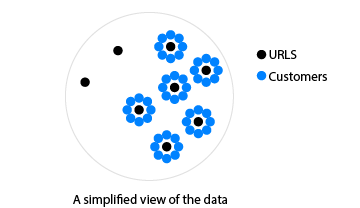

In [3]:
Image('ms-data.png')

In [420]:
%%writefile mostFrequentVisitors.py
#!/usr/bin/env python
#START STUDENT CODE44
from mrjob.job import MRJob
from mrjob.step import MRStep
import logging
class MRVisitorCount(MRJob):
    
    SORT_VALUES = True
    JOBCONF = {"mapreduce.job.reduces": "1"}
    def __init__(self, *args, **kwargs):
        super(MRVisitorCount, self).__init__(*args,**kwargs)
        
    def mapper_visits(self, _, line):
        fields = line.split(",")
#         if len(fields) == 5:
#             yield (fields[1],"C",fields[4]),1
#         elif len(fields) == 2:
#             yield (fields[0],"A",fields[1]),1
        if len(fields) == 5:
            yield int(fields[1]), ("C",fields[4], 1)
        elif len(fields) == 2:
            yield int(fields[0]), ("A",fields[1], 1)

    def reducer_visits(self, page_id, visits):
        visits = list(visits)
        logging.warning(page_id)
        logging.warning(visits)
        page_path = None
        curr_cust = None
        curr_count = 0
        max_cust = None
        max_count = 0
        for val in visits:
            if val[0] == "A":
                page_path = val[1]
            elif curr_cust == val[1]:
                curr_count +=val[2]
            else:
                if curr_cust:
                    if curr_count > max_count:
                        max_cust = curr_cust
                        max_count = curr_count
                curr_cust = val[1]
                curr_count = val[2]
        if curr_count > max_count:
            max_cust = curr_cust
            max_count = curr_count
        logging.warning( "end for "+str(page_id))
        yield page_path, (page_id, max_cust, max_count)
    
    def steps(self):
        return [
            MRStep(mapper = self.mapper_visits,
                   reducer = self.reducer_visits,
                   jobconf={
                       "mapreduce.job.reduces": "1",
                       "stream.num.map.output.key.fields": 3,
                       "mapreduce.job.output.key.comparator.class" : "org.apache.hadoop.mapred.lib.KeyFieldBasedComparator",
                       "mapreduce.partition.keycomparator.options":"-k1,1 -k2,2 -k3,3n",
                       "SORT_VALUES":True
                   }
                  )
        ]
if __name__ == "__main__":
    MRVisitorCount.run()
#END STUDENT CODE44

Overwriting mostFrequentVisitors.py


In [387]:
!chmod +x mostFrequentVisitors.py

### Run a test on some data that has multiple visits

In [363]:
%%writefile test.data
V,1000,1,C,10001
V,1001,1,C,10001
V,1001,1,C,10001
V,1001,1,C,10001
V,1001,1,C,10002
V,1002,1,C,10001
V,1001,1,C,10002
V,1003,1,C,10002
V,1001,1,C,10003
V,1003,1,C,10003
V,1004,1,C,10003
V,1005,1,C,10004
V,1006,1,C,10005
V,1006,1,C,10005
V,1006,1,C,10005
V,1006,1,C,10005
V,1006,1,C,10003
V,1006,1,C,10003

Overwriting test.data


In [380]:
%%writefile test-att.data
1000,/regwiz
1001,/support
1002,/athome
1003,/kb
1004,/search
1005,/norge
1006,/misc

Writing test-att.data


In [373]:
!cat anonymous-attr-preprocessed.data

1287,/autoroute
1288,/library
1289,/masterchef
1297,/centroam
1215,/developer


Expected Output on test.data

In [ ]:
            URL |    PageID |    CustID | Num Visits
----------------------------------------------------------------------
      "/regwiz" |      1000 |     10001 |         1
     "/support" |      1001 |     10001 |         3
      "/athome" |      1002 |     10001 |         1
          "/kb" |      1003 |     10002 |         1
      "/search" |      1004 |     10003 |         1
       "/norge" |      1005 |     10004 |         1
        "/misc" |      1006 |     10005 |         4

In [421]:
!python mostFrequentVisitors.py test.data test-att.data -r hadoop

No configs found; falling back on auto-configuration
Looking for hadoop binary in $PATH...
Found hadoop binary: /usr/bin/hadoop
Using Hadoop version 2.6.0
Looking for Hadoop streaming jar in /home/hadoop/contrib...
Looking for Hadoop streaming jar in /usr/lib/hadoop-mapreduce...
Found Hadoop streaming jar: /usr/lib/hadoop-mapreduce/hadoop-streaming.jar
Creating temp directory /tmp/mostFrequentVisitors.root.20180203.194825.277359
Copying local files to hdfs:///user/root/tmp/mrjob/mostFrequentVisitors.root.20180203.194825.277359/files/...
Running step 1 of 1...
  packageJobJar: [] [/usr/jars/hadoop-streaming-2.6.0-cdh5.7.0.jar] /tmp/streamjob8950375242425686798.jar tmpDir=null
  Connecting to ResourceManager at /0.0.0.0:8032
  Connecting to ResourceManager at /0.0.0.0:8032
  Total input paths to process : 2
  number of splits:3
  Submitting tokens for job: job_1517652631830_0033
  Submitted application application_1517652631830_0033
  The url to track the job: http://quickstart.cloudera:

In [423]:
from mostFrequentVisitors import MRVisitorCount
mr_job = MRVisitorCount(args=["test.data","test-att.data","-r", "hadoop"])
count = 0
with mr_job.make_runner() as runner:
    runner.run()
    for line in runner.stream_output():
        print mr_job.parse_output_line(line)

(u'/regwiz', [1000, u'10001', 1])
(u'/support', [1001, u'10001', 3])
(u'/athome', [1002, u'10001', 1])
(u'/kb', [1003, u'10002', 1])
(u'/search', [1004, u'10003', 1])
(u'/norge', [1005, u'10004', 1])
(u'/misc', [1006, u'10005', 4])


In [ ]:
from mostFrequentVisitors import MRVisitorCount
mr_job = MRVisitorCount(args=["anonymous-msweb-preprocessed.data","anonymous-attr-preprocessed.data","-r", "hadoop"])
count = 0
with mr_job.make_runner() as runner:
    runner.run()
    for line in runner.stream_output():
        print mr_job.parse_output_line(line)

In [ ]:
Sample Output:
(u'/regwiz', [1000, u'10001', 1])
(u'/support', [1001, u'10001', 1])
(u'/athome', [1002, u'10001', 1])
(u'/kb', [1003, u'10002', 1])
(u'/search', [1004, u'10003', 1])
(u'/norge', [1005, u'10004', 1])
(u'/misc', [1006, u'10005', 1])
(u'/ie_intl', [1007, u'10007', 1])
(u'/msdownload', [1008, u'10009', 1])
(u'/windows', [1009, u'10009', 1])
(u'/vbasic', [1010, u'10010', 1])
(u'/officedev', [1011, u'10010', 1])
(u'/outlookdev', [1012, u'10010', 1])
(u'/vbasicsupport', [1013, u'10010', 1])
(u'/officefreestuff', [1014, u'10010', 1])
(u'/msexcel', [1015, u'10011', 1])
(u'/excel', [1016, u'10011', 1])
(u'/products', [1017, u'10011', 1])
(u'/isapi', [1018, u'10011', 1])
(u'/mspowerpoint', [1019, u'10011', 1])
(u'/msdn', [1020, u'10012', 1])
...

## HW4.5 - Clustering Tweet Dataset

For this question use the Tweet data in `topUsers_Apr-Jul_2014_1000-words.txt`, you will implement a 1000-dimensional K-means algorithm in MrJob on the users by their 1000-dimensional word stripes/vectors using several centroid initializations and values of K.

Note that each "point" is a user as represented by 1000 words, and that word-frequency distributions are generally heavy-tailed power-laws(often called Zipf distributions), and are very rare in the larger class of discrete, random distributions. For each user you will have to normalize by its "TOTAL" column. __Try several parameterizations and initializations__ :

* (A) K=4 uniform random centroid-distributions over the 1000 words (generate 1000 random numbers and normalize the vectors)
* (B) K=2 perturbation-centroids, randomly perturbed from the aggregated (user-wide) distribution 
* (C) K=4 perturbation-centroids, randomly perturbed from the aggregated (user-wide) distribution 
* (D) K=4 "trained" centroids, determined by the sums across the classes. Use use the 
(row-normalized) class-level aggregates as 'trained' starting centroids (i.e., the training is already done for you!).

Note that you do not have to compute the aggregated distribution or the class-aggregated distributions, which are rows in the auxiliary file `topUsers_Apr-Jul_2014_1000-words_summaries.txt`. 

For (A),  we select 4 users randomly from a uniform distribution [1,...,1,000]. For (B), (C), and (D)  you will have to use data from the auxiliary file. In parts (B) and (C), you will have to perturb the 1000-user aggregate (after initially normalizing by its sum, which is also provided). So if in (B) you want to create 2 perturbations of the aggregate, startwith (1), normalize, and generate 1000 random numbers uniformly from the unit interval (0,1) twice (for two centroids), using:

In [443]:
from numpy import random
numbers = random.sample(1000)

Take these 1000 numbers and add them (component-wise) to the 1000-user aggregate,
and then renormalize to obtain one of your aggregate-perturbed initial centroids.

In [516]:
###################################################################################
##Geneate random initial centroids around the global aggregate
##Part (B) and (C) of this question
###################################################################################
def startCentroidsBC(k):
    counter = 0
    for line in open("topUsers_Apr-Jul_2014_1000-words_summaries.txt").readlines():
        if counter == 1:        
            data = re.split(",",line)
            globalAggregate = [float(data[i+3])/float(data[2]) for i in range(1000)]
        counter += 1
    #perturb the global aggregate for the four initializations    
    centroids = []
    for i in range(k):
        rndpoints = random.sample(1000)
        peturpoints = [rndpoints[n]/10+globalAggregate[n] for n in range(1000)]
        centroids.append(peturpoints)
        total = 0
        for j in range(len(centroids[i])):
            total += centroids[i][j]
        for j in range(len(centroids[i])):
            centroids[i][j] = centroids[i][j]/total
    return np.array(centroids)

print startCentroidsBC(2)[0]

[  1.15048779e-03   1.50236280e-03   2.07892039e-03   1.21979136e-03
   2.28847124e-03   1.35133262e-03   1.81244077e-03   5.89954340e-04
   1.70421020e-03   4.13743618e-04   2.90063170e-04   2.10972670e-03
   1.84672565e-03   5.21554452e-04   9.34078278e-04   4.91549019e-04
   1.29250180e-03   1.19590543e-03   1.85188155e-03   1.61492417e-04
   5.92410032e-04   1.02868891e-03   3.77446058e-04   2.68347310e-04
   8.40048071e-04   1.70697341e-03   1.28545505e-03   1.10697834e-04
   3.68721114e-04   2.06289573e-03   1.85411100e-03   6.98390058e-04
   2.64147634e-04   1.61494039e-03   1.02276706e-04   8.78804822e-04
   2.02217742e-03   3.96201976e-04   1.06567239e-03   2.63425436e-04
   1.17359115e-03   9.33836844e-04   1.97328761e-03   1.79902885e-03
   5.77147155e-04   1.46777177e-03   1.98900983e-03   1.67429026e-03
   3.23079091e-04   6.67304643e-04   3.67297414e-04   1.91558767e-03
   9.89816626e-04   5.82647553e-04   1.75419460e-03   2.05498301e-03
   1.94530953e-03   1.80862930e-03

In [595]:
def startCentroidsA(k):
    counter = 0
    centroid_rows = np.random.randint(0,999, size=k)
    centroids = []
    for line in open("topUsers_Apr-Jul_2014_1000-words.txt").readlines():
        if counter in centroid_rows:
            data = re.split(",",line)
            centroids.append([float(d) for d in data[3:]])
        if counter >max(centroid_rows):
            break
        counter +=1
    return centroids

For experiments A, B, C and D and iterate until a threshold (try 0.001) is reached.
After convergence, print out a summary of the classes present in each cluster.
In particular, report the composition as measured by the total
portion of each class type (0-3) contained in each cluster,
and discuss your findings and any differences in outcomes across parts A-D.

<h2>K-Means</h2>
K-means is a clustering method that aims to find the positions μi,i=1...k of the clusters that minimize the distance from the data points to the cluster. K-means clustering solves:
<br><br>
$$\arg\min_{c} \sum_{i=1}^k\sum_{{x}\in c_i} d({x},\mu_i) = \arg\min_{c} \sum_{i=1}^k\sum_{{x}\in c_i} \left\Vert {x}-\mu_i \right\Vert_2^2$$
<br><br>
where ${c}_i$ is the set of points that belong to cluster i. The K-means clustering uses the square of the Euclidean distance $d({x},\mu_i) = \left\Vert {x}-\mu_i \right\Vert_2^2$. This problem is not trivial (in fact it is NP-hard), so the K-means algorithm only hopes to find the global minimum, possibly getting stuck in a different solution.

<h2>K-means algorithm</h2>

The Lloyd's algorithm, mostly known as k-means algorithm, is used to solve the k-means clustering problem and works as follows. First, decide the number of clusters k. Then:

<table>
<tbody><tr><td>1. Initialize the center of the clusters</td>
<td>${\mu}_i = $ some value $, i=1,...,k$</td>
</tr>
<tr>
<td>2. Attribute the closest cluster to each data point</td>
<td>${c}_i = \{j: d({x}_j, \mu_i) \le d({x}_j, \mu_l),  l \ne i, j=1,...,n\}$ </td>
</tr>
<tr>
<td>3. Set the position of each cluster to the mean of all data points belonging to that cluster</td>
<td>$\mu_i = \frac{1}{|c_i|}\sum_{j\in c_i} {x}_j,\forall i$</td>
</tr>
<tr><td>4. Repeat steps 2-3 until convergence</td>
<td></td>
</tr>
<tr><td>Notation</td><td>${|c|} = $ number of elements in  ${c}$</td>
</tr>
</tbody>
</table>

<h2>Calculating purity</h2>
![purity illustration](http://www.candpgeneration.com/images/purity.png)

__`topUsers_Apr-Jul_2014_1000-words.txt`__  
Notes about the data coding:  
> This file consists of word frequency distributions for 1,000 twitter users. These Twitter users use language in very different ways,and were classified by hand according to the criteria:  

>__0__: Human, _where only basic human-human communication is observed._  

>__1__: Cyborg, _where language is primarily borrowed from other sources. (e.g., jobs listings, classifieds postings, advertisements, etc...)._  

> __2__: Robot, _where language is formulaically derived from unrelated sources(e.g., weather/seismology, police/fire event logs, etc...)._  

>__3__: Spammer, _where language is replicated to high multiplicity
(e.g., celebrity obsessions, personal promotion, etc...)_

Data format:
> `USERID,CODE,TOTAL,WORD1_COUNT,WORD2_COUNT,...`  
where   
USERID = unique user identifier  
CODE = 0/1/2/3 class code  
TOTAL = sum of the word counts  


In [425]:
# take a look at the first row
!head -n 1 topUsers_Apr-Jul_2014_1000-words.txt

1180025371,2,1724608,75552,827,57603,7128,4282,45674,66811,27632,0,8,23783,2,42853,0,62335,22349,21428,19801,4125,0,0,2,1585,21118,1,1,1,16079,19676,1587,0,19695,0,0,0,0,0,0,2,20216,60,4278,0,16,46,788,2,0,0,3,0,3,0,0,111122,0,12,0,0,0,2,739,0,176,0,0,0,38,626,0,0,0,6,1584,0,19672,510,0,0,0,12,0,1675,0,0,0,0,5,2,0,0,1,9,0,0,31,0,0,2,0,0,0,0,4,64,476,0,1,0,617,0,0,15672,70315,70317,0,2997,0,0,0,665,0,0,12,0,0,0,3135,1,2,39,0,0,0,0,23,0,1,0,179,667,0,0,32,0,0,224,5,0,0,66,0,3,450,96,0,0,0,0,8,15,15,0,115,0,0,19672,0,46,15,0,0,2,0,51,0,0,0,298,0,0,5,2,165,3,0,0,46497,0,19675,0,4,0,42036,0,0,40035,84,0,103,0,2,12,1924,7,0,0,0,0,3,0,42629,197,15490,0,0,45,0,0,0,0,0,0,301,0,0,0,0,134,3300,0,422,386,0,19826,2,0,0,46,9,354,175,71,165,20338,0,109,0,1,44376,0,1370,0,0,0,0,0,0,0,0,0,0,2,0,0,4462,0,0,5,0,202,436,408,0,61,0,0,39888,74,0,19672,0,0,0,0,0,19672,19672,2,2,349,0,13,0,30,0,0,8,0,40,0,23,0,12,337,0,12,19952,26,0,0,15489,0,0,0,0,39,0,0,26,0,0,19,144,161,0,0,0,5558,0,23,1561,52,0,0,0,9,0,0,

In [427]:
a = "1180025371,2,1724608,75552,827,57603,7128,4282,45674,66811,27632,0,8,23783,2,42853,0,62335,22349,21428,19801,4125,0,0,2,1585,21118,1,1,1,16079,19676,1587,0,19695,0,0,0,0,0,0,2,20216,60,4278,0,16,46,788,2,0,0,3,0,3,0,0,111122,0,12,0,0,0,2,739,0,176,0,0,0,38,626,0,0,0,6,1584,0,19672,510,0,0,0,12,0,1675,0,0,0,0,5,2,0,0,1,9,0,0,31,0,0,2,0,0,0,0,4,64,476,0,1,0,617,0,0,15672,70315,70317,0,2997,0,0,0,665,0,0,12,0,0,0,3135,1,2,39,0,0,0,0,23,0,1,0,179,667,0,0,32,0,0,224,5,0,0,66,0,3,450,96,0,0,0,0,8,15,15,0,115,0,0,19672,0,46,15,0,0,2,0,51,0,0,0,298,0,0,5,2,165,3,0,0,46497,0,19675,0,4,0,42036,0,0,40035,84,0,103,0,2,12,1924,7,0,0,0,0,3,0,42629,197,15490,0,0,45,0,0,0,0,0,0,301,0,0,0,0,134,3300,0,422,386,0,19826,2,0,0,46,9,354,175,71,165,20338,0,109,0,1,44376,0,1370,0,0,0,0,0,0,0,0,0,0,2,0,0,4462,0,0,5,0,202,436,408,0,61,0,0,39888,74,0,19672,0,0,0,0,0,19672,19672,2,2,349,0,13,0,30,0,0,8,0,40,0,23,0,12,337,0,12,19952,26,0,0,15489,0,0,0,0,39,0,0,26,0,0,19,144,161,0,0,0,5558,0,23,1561,52,0,0,0,9,0,0,35319,0,0,68,0,0,0,0,0,0,0,8,0,0,222,463,60,0,77,0,20219,0,1,4581,0,0,0,297,0,0,0,0,0,68,0,17942,0,38,226,0,0,0,0,9,19,0,0,0,0,0,217,12,261,0,25052,263,0,0,0,1,0,59,27,14,133,76,234,24966,0,0,1,2,11,44,3,0,0,43,0,3,3,2,0,0,0,2,0,0,7,47,0,0,0,0,2,0,0,1,0,0,0,0,175,0,0,5,1,0,0,0,7,0,0,104,53,0,0,16,13,26,0,11,0,6,77,0,17,0,360,0,0,1693,0,147,0,10,0,0,0,61,1,0,0,113,0,0,1,0,305,14,23,0,42,0,0,0,1,14,2391,6,0,21,0,0,911,3,0,0,0,0,0,0,0,0,39,0,25088,0,0,0,34,134,59,35,45,1584,40,2,8,0,249,0,72,0,0,0,0,0,2,0,0,0,0,0,25,0,13,0,0,4223,30,0,0,0,0,0,0,184,1,5558,0,0,24,0,61,7,38,0,309,0,25,0,0,0,0,0,0,0,0,0,3,258,0,0,0,0,0,710,0,62,0,21,0,0,0,0,820,0,0,19672,0,1,0,0,8,74,0,0,0,87,15390,12,20216,1,0,2,10810,11,0,0,47,0,0,797,95,19826,143,0,2,772,0,0,0,117,90,0,56,1,0,0,86,382,807,0,0,0,77,0,97,0,169,282,0,0,0,0,0,0,14,1,0,0,0,0,202,825,1,10,0,803,98,0,167,113,0,263,18506,0,18521,0,243,4,88,0,46,0,0,0,0,15,0,718,1,0,0,0,0,261,0,0,0,454,3028,0,0,0,48,0,0,0,48,0,112,0,0,140,0,1,0,0,0,0,0,2701,0,0,13,0,0,178,741,0,0,1,0,0,0,0,0,352,5,0,0,42,0,0,94,0,0,0,9,0,0,0,0,2,15489,0,11,225,0,5,0,811,0,5,0,43,0,16,277,26,0,11,0,0,0,0,0,0,0,0,0,0,0,0,15489,0,0,0,0,0,0,0,0,0,0,0,95,61,9,0,70,0,28,0,0,135,0,0,0,31,12,0,0,0,0,1,0,0,1,202,0,0,0,39,0,0,125,0,0,48,0,0,24,0,13,272,48,22,0,74,0,0,0,23,0,5,0,2,21,0,0,0,69,12512,0,0,38,0,0,16,0,0,0,0,0,7,2,1,0,17,1,0,0,0,0,18,14,0,0,0,90,0,0,0,128,45,0,1,0,0,0,2,8,0,30,11,15,28,0,0,0,0,0,0,0,0,0,113,0,0,0,50,0,0,0,5,0,118,0,6,85,56,15,12,0,0,0,176,10,57,12,289,0,27,0,0,0,0,0,23,89,0,221,0,16,0,0,0,0,0,14,33,126,11,32,1,137,13,0,0,0,0,0,0,0,0,0,1,0,98,0,0,0,45,0,215,0,0,0,0,71,76,0,0,0,15,108,0,0,176,0,0,0,0,121,0,0,0,0"
len(a.split(","))

1003

__`topUsers_Apr-Jul_2014_1000-words_summaries.txt`__
This file contains 5 special word-frequency distributions.
Notes about the format of this auxillary information:  
> Row 1: Words  
Row 2: 1000-user-wide aggregated distribution across all classes  
Row 3-6 class-aggregated distributions for clases 0-3  

In [426]:
# take a look at the first few columns
!cut -d ',' -f 1-8 topUsers_Apr-Jul_2014_1000-words_summaries.txt

"ID","CODE","TOTAL_WORDS","http","I","the","to","you"
ALL_CODES,NA,61819567,2488393,1989622,1329663,1259298,1181631
CODE,0,35130977,449927,1668694,914155,957278,916553
CODE,1,11423284,1239122,28497,117272,104367,10209
CODE,2,9373246,613561,42672,191091,60120,31309
CODE,3,5892060,185783,249759,107145,137533,223560


In [431]:
!wc -l topUsers_Apr-Jul_2014_1000-words_summaries.txt

6 topUsers_Apr-Jul_2014_1000-words_summaries.txt


In [691]:
%%writefile Kmeans.py
#!/usr/bin/env python
#START STUDENT CODE45
from mrjob.job import MRJob
from mrjob.step import MRStep
import logging, re
import numpy as np

def stop_criterion(centroids_old, centroids_new, alpha):
    diff = abs(np.array(centroids_old) - np.array(centroids_new))
    return np.all(diff <= alpha)

def min_distance(centroids, datapoint):
    dp = np.array(datapoint)
    diff = dp -centroids
    diffsq = diff * diff
    minidx = np.argmin(list(diffsq.sum(axis = 1)))
    return minidx

def startCentroidsA(k):
    counter = 0
    centroid_rows = np.random.randint(0,999, size=k)
    centroids = []
    for line in open("topUsers_Apr-Jul_2014_1000-words.txt").readlines():
        if counter in centroid_rows:
            data = re.split(",",line)
            centroids.append([float(d) for d in data[3:]])
        if counter >max(centroid_rows):
            break
        counter +=1
    return centroids

def startCentroidsBC(k):
    counter = 0
    for line in open("topUsers_Apr-Jul_2014_1000-words_summaries.txt").readlines():
        if counter == 1:        
            data = re.split(",",line)
            globalAggregate = [float(data[i+3])/float(data[2]) for i in range(1000)]
        counter += 1
    #perturb the global aggregate for the four initializations    
    centroids = []
    for i in range(k):
        rndpoints = np.random.sample(1000)
        peturpoints = [rndpoints[n]/10+globalAggregate[n] for n in range(1000)]
        centroids.append(peturpoints)
        total = 0
        for j in range(len(centroids[i])):
            total += centroids[i][j]
        for j in range(len(centroids[i])):
            centroids[i][j] = centroids[i][j]/total
    return centroids

def startCentroidsD(k):
    counter = 0
    centroids = [[],[],[],[]]
    for line in open("topUsers_Apr-Jul_2014_1000-words_summaries.txt").readlines():
        if counter in [2,3,4,5]:        
            data = re.split(",",line)
            cls = int(data[1])
            class_agg = [float(d) for d in data[3:]]
            centroids[cls]=class_agg
        counter += 1
    return centroids

class MRKmeans(MRJob):
    
    JOBCONF = {"mapreduce.job.reduces": "1"}
    
    def __init__(self, *args, **kwargs):
        super(MRKmeans, self).__init__(*args,**kwargs)
        self.centroids = []
        self.k = 4
    
    def mapper_init(self):        
        self.centroids = [map(float,s.split('\n')[0].split(',')) for s in open("Centroids.txt").readlines()]
        print len(self.centroids)
    def mapper(self, _, line):
        fields = line.split(",")
        datapoint = (map(float, fields[3:]))
        c_min_idx = min_distance(self.centroids, datapoint)
        yield int(c_min_idx), (datapoint,1)
    
    def reducer(self, c_idx, datapoints):
        total = 0
        num = 0
        for dp,n in datapoints:
            num += n
            total += np.array(dp)
        yield c_idx, (total/num)
    
    def steps(self):
        return [
            MRStep(
                mapper_init= self.mapper_init,
                mapper = self.mapper,
                reducer = self.reducer
            )
        ]
    
if __name__ == '__main__':
    MRKmeans.run()

#END STUDENT CODE45

Overwriting Kmeans.py


In [679]:
%%writefile kmeans_runner.py
#!/usr/bin/env python
#START STUDENT CODE45_RUNNER
from Kmeans import MRKmeans, stop_criterion, startCentroidsA, startCentroidsBC, startCentroidsD
k = 4
alpha = 0.01
centroids = startCentroidsD(k)
with open('Centroids.txt', 'w+') as f:
    f.writelines(','.join(str(j) for j in i) + '\n' for i in centroids)
    
mr_job = MRKmeans(args=['topUsers_Apr-Jul_2014_1000-words.txt', '--file=Centroids.txt'])

i = 0
while(1):
    centroids_old = centroids[:]
    print "iteration "+str(i)
    with mr_job.make_runner() as runner:
        runner.run()
        for line in runner.stream_output():
            c_idx, centroid_loc = mr_job.parse_output_line(line)
            print c_idx, len(centroid_loc)
            centroids[c_idx] = centroid_loc
        # Update the centroids for the next iteration
        with open('Centroids.txt', 'w') as f:
            f.writelines(','.join(str(j) for j in i) + '\n' for i in centroids)
        
    print "\n"
    i = i + 1
    if(stop_criterion(centroids_old,centroids,alpha)):
        break
print "Centroids\n"
#END STUDENT CODE45_RUNNER

Overwriting kmeans_runner.py


In [647]:
# Running with A
!python kmeans_runner.py

iteration 0
0 1000
1 1000
2 1000
3 1000


iteration 1
0 1000
1 1000
2 1000
3 1000


iteration 2
0 1000
1 1000
2 1000
3 1000


iteration 3
0 1000
1 1000
2 1000
3 1000


iteration 4
0 1000
1 1000
2 1000
3 1000


iteration 5
0 1000
1 1000
2 1000
3 1000


iteration 6
0 1000
1 1000
2 1000
3 1000


iteration 7
0 1000
1 1000
2 1000
3 1000


iteration 8
0 1000
1 1000
2 1000
3 1000


iteration 9
0 1000
1 1000
2 1000
3 1000


iteration 10
0 1000
1 1000
2 1000
3 1000


iteration 11
0 1000
1 1000
2 1000
3 1000


iteration 12
0 1000
1 1000
2 1000
3 1000


iteration 13
0 1000
1 1000
2 1000
3 1000


iteration 14
0 1000
1 1000
2 1000
3 1000


iteration 15
0 1000
1 1000
2 1000
3 1000


iteration 16
0 1000
1 1000
2 1000
3 1000


iteration 17
0 1000
1 1000
2 1000
3 1000


iteration 18
0 1000
1 1000
2 1000
3 1000


iteration 19
0 1000
1 1000
2 1000
3 1000


iteration 20
0 1000
1 1000
2 1000
3 1000


iteration 21
0 1000
1 1000
2 1000
3 1000


iteration 22
0 1000
1 1000
2 1000
3 1000


iteration 23
0 1000
1

In [672]:
%%writefile KmeansEval.py
#!/usr/bin/env python
#START STUDENT CODE45
from mrjob.job import MRJob
from mrjob.step import MRStep
from Kmeans import min_distance
import logging, re
import numpy as np

class MRKmeansEval(MRJob):
    
    JOBCONF = {"mapreduce.job.reduces": "1"}
    
    def __init__(self, *args, **kwargs):
        super(MRKmeansEval, self).__init__(*args,**kwargs)
        self.centroids = []
        self.k = 4
    
    def mapper_init(self):        
        self.centroids = [map(float,s.split('\n')[0].split(',')) for s in open("Centroids.txt").readlines()]
    
    def mapper(self, _, line):
        fields = line.split(",")
        cl = fields[1]
        datapoint = (map(float, fields[3:]))
        c_min_idx = min_distance(self.centroids, datapoint)
        yield int(c_min_idx), (int(cl),1)
    
    def reducer(self, key, vals):
        cl_sum = [0]*4
        for cl,n in vals:
            cl_sum[cl] +=n
        yield key, (cl_sum)

if __name__ == '__main__':
    MRKmeansEval.run()

Overwriting KmeansEval.py


In [668]:
%%writefile kmeans_eval_runner.py
#!/usr/bin/env python
#START STUDENT CODE45_RUNNER
from KmeansEval import MRKmeansEval
    
mr_job = MRKmeansEval(args=['topUsers_Apr-Jul_2014_1000-words.txt', '--file=Centroids.txt'])
with mr_job.make_runner() as runner:
    runner.run()
    for line in runner.stream_output():
        print mr_job.parse_output_line(line)
#END STUDENT CODE45_RUNNER

Overwriting kmeans_eval_runner.py


In [656]:
# Running with A
!python kmeans_eval_runner.py

(0, [0, 0, 4, 0])
(1, [0, 4, 4, 0])
(2, [0, 37, 2, 0])
(3, [752, 50, 44, 103])


In [666]:
# Running with B2
!python kmeans_runner.py

iteration 0
0 1000
1 1000


iteration 1
0 1000
1 1000


iteration 2
0 1000
1 1000


iteration 3
0 1000
1 1000


iteration 4
0 1000
1 1000


iteration 5
0 1000
1 1000


iteration 6
0 1000
1 1000


iteration 7
0 1000
1 1000


iteration 8
0 1000
1 1000


iteration 9
0 1000
1 1000


Centroids



In [671]:
# Running with B2
!python kmeans_eval_runner.py

(0, [0, 15, 9, 0])
(1, [752, 76, 45, 103])


In [674]:
# Running with C4
!python kmeans_runner.py

iteration 0
0 1000
1 1000
2 1000
3 1000


iteration 1
0 1000
1 1000
2 1000
3 1000


iteration 2
0 1000
1 1000
2 1000
3 1000


iteration 3
0 1000
1 1000
2 1000
3 1000


iteration 4
0 1000
1 1000
2 1000
3 1000


iteration 5
0 1000
1 1000
2 1000
3 1000


iteration 6
0 1000
1 1000
2 1000
3 1000


iteration 7
0 1000
1 1000
2 1000
3 1000


iteration 8
0 1000
1 1000
2 1000
3 1000


iteration 9
0 1000
1 1000
2 1000
3 1000


iteration 10
0 1000
1 1000
2 1000
3 1000


iteration 11
0 1000
1 1000
2 1000
3 1000


iteration 12
0 1000
1 1000
2 1000
3 1000


iteration 13
0 1000
1 1000
2 1000
3 1000


iteration 14
0 1000
1 1000
2 1000
3 1000


iteration 15
0 1000
1 1000
2 1000
3 1000


iteration 16
0 1000
1 1000
2 1000
3 1000


Centroids



In [675]:
# Running with C4
!python kmeans_eval_runner.py

(0, [752, 56, 44, 103])
(1, [0, 4, 2, 0])
(2, [0, 0, 3, 0])
(3, [0, 31, 5, 0])


In [692]:
# Running with D4
!python kmeans_runner.py

iteration 0
4
4
3 1000


iteration 1
4
4
3 1000


Centroids



In [693]:
# Running with D4
!python kmeans_eval_runner.py

(3, [752, 91, 54, 103])


## HW4.6  - (OPTIONAL) Scaleable K-MEANS++ 

Over half a century old and showing no signs of aging,
k-means remains one of the most popular data processing
algorithms. As is well-known, a proper initialization
of k-means is crucial for obtaining a good final solution.
The recently proposed k-means++ initialization algorithm
achieves this, obtaining an initial set of centers that is provably
close to the optimum solution. A major downside of the
k-means++ is its inherent sequential nature, which limits its
applicability to massive data: one must make k passes over
the data to find a good initial set of centers. The paper listed below 
shows how to drastically reduce the number of passes needed
to obtain, in parallel, a good initialization. This is unlike
prevailing efforts on parallelizing k-means that have mostly
focused on the post-initialization phases of k-means. The 
proposed initialization algorithm k-means||
obtains a nearly optimal solution after a logarithmic number
of passes; the paper also shows that in practice a constant
number of passes suffices. Experimental evaluation on realworld
large-scale data demonstrates that k-means|| outperforms
k-means++ in both sequential and parallel settings.

Read the following paper entitled "Scaleable K-MEANS++" located at:

http://theory.stanford.edu/~sergei/papers/vldb12-kmpar.pdf 

In MrJob, implement K-MEANS|| and compare with a random initializtion when used in 
conjunction with the kmeans algorithm as an initialization step for the 2D  dataset 
generated using code in the following notebook:

https://www.dropbox.com/s/lbzwmyv0d8rocfq/MrJobKmeans.ipynb?dl=0

Plot the initialation centroids and the centroid trajectory as the K-MEANS|| algorithms iterates. 
Repeat this for a random initalization (i.e., pick a training vector at random for each inital centroid)
of the kmeans algorithm. Comment on the trajectories of both algorithms.
Report on the number passes over the training data, and time required to run both  clustering algorithms.
Also report the rand index score for both algorithms and comment on your findings.

### 4.6.1 (OPTIONAL) Apply K-MEANS||

Apply your implementation of K-MEANS|| to the dataset  in HW 4.5 and compare to the a random initalization (i.e., pick a training vector at random for each inital centroid)of the kmeans algorithm.
Report on the number passes over the training data, and time required to run all  clustering algorithms. 
Also report the rand index score for both algorithms and comment on your findings.

## HW4.7 - (OPTIONAL) Canopy Clustering

An alternative way to intialize the k-means algorithm is the  canopy clustering. The canopy clustering 
algorithm is an unsupervised pre-clustering algorithm introduced by Andrew McCallum, Kamal Nigam and 
Lyle Ungar in 2000. It is often used as preprocessing step for the K-means algorithm or the 
Hierarchical clustering algorithm. It is intended to speed up clustering operations on large data sets, 
where using another algorithm directly may be impractical due to the size of the data set.

For more details on the Canopy Clustering algorithm see:

https://en.wikipedia.org/wiki/Canopy_clustering_algorithm

Plot the initialation centroids and the centroid trajectory as the Canopy Clustering based K-MEANS algorithm iterates. 
Repeat this for a random initalization (i.e., pick a training vector at random for each inital centroid)
of the kmeans algorithm. Comment on the trajectories of both algorithms.
Report on the number passes over the training data, and time required to run both  clustering algorithms.
Also report the rand index score for both algorithms and comment on your findings.

### 4.7.1 (OPTIONAL) Apply Canopy Clustering based K-MEANS

Apply your implementation Canopy Clustering based K-MEANS algorithm to the dataset  in HW 4.5 and compare to the a 
random initalization (i.e., pick a training vector at random for each inital centroid)of the kmeans algorithm.
Report on the number passes over the training data, and time required to run both  clustering algorithms. 
Also report the rand index score for both algorithms and comment on your findings.